In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score

In [5]:
# import all data

neural_resp1 = pd.read_csv('data/NeuralResponses_S1.txt')
neural_resp2 = pd.read_csv('data/NeuralResponses_S2.txt')
cat_labels = pd.read_csv('data/CategoryLabels.txt')
cat_vecs = pd.read_csv('data/CategoryVectors.txt')


In [48]:
anim_indices = cat_vecs.index[cat_vecs['Var2'] == 0].tolist()
df_anim = neural_resp1[neural_resp1.index.isin(anim_indices)].reset_index()

inanim_indices = cat_vecs.index[cat_vecs['Var2'] == 1].tolist()
df_inanim = neural_resp1[neural_resp1.index.isin(inanim_indices)].reset_index()

In [49]:
avg_anim = df_anim.mean(axis=1)
avg_inanim = df_inanim.mean(axis=1)

In [50]:
len(avg_anim)

44

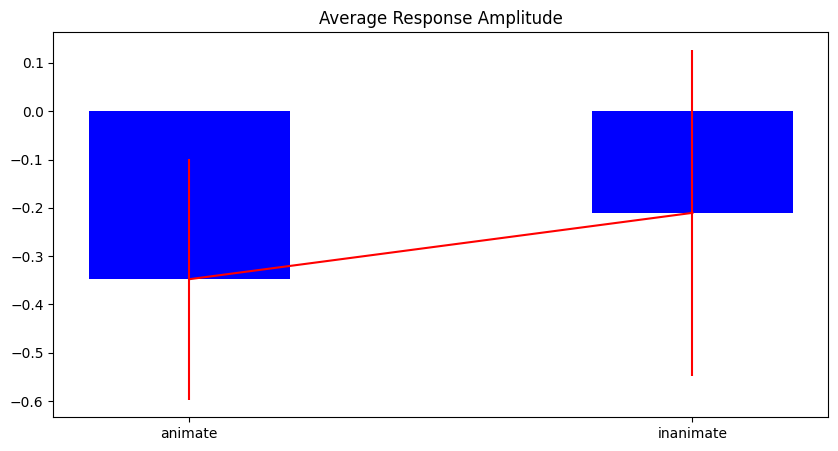

In [80]:
from scipy.stats import sem

# create bar plot
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(['animate', 'inanimate'], [np.mean(avg_anim), np.mean(avg_inanim)], color ='blue', width = 0.4)
plt.errorbar(['animate', 'inanimate'], [np.mean(avg_anim), np.mean(avg_inanim)], yerr=[sem(avg_anim), sem(avg_inanim)], color="red")

#plt.xlabel("Courses offered")
#plt.ylabel("No. of students enrolled")
plt.title("Average Response Amplitude")
plt.show()

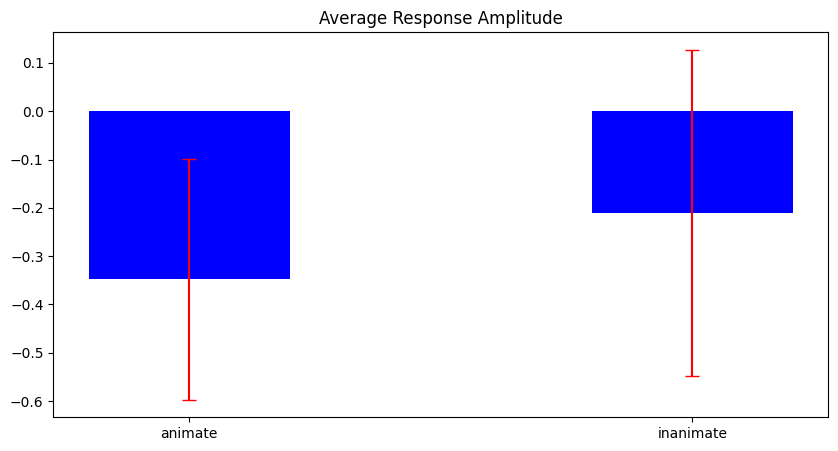

In [78]:
from scipy.stats import sem
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
avg_anim = np.random.randn(10)  # Example data for 'animate'
avg_inanim = np.random.randn(10)  # Example data for 'inanimate'

# Calculate means and standard errors
mean_anim = np.mean(avg_anim)
mean_inanim = np.mean(avg_inanim)
sem_anim = sem(avg_anim)
sem_inanim = sem(avg_inanim)

# Create bar plot
fig = plt.figure(figsize=(10, 5))

# Create the bar plot
plt.bar(['animate', 'inanimate'], [mean_anim, mean_inanim], color='blue', width=0.4)

# Add error bars without connecting lines
plt.errorbar(['animate', 'inanimate'], [mean_anim, mean_inanim], yerr=[sem_anim, sem_inanim], fmt='none', color='red', capsize=5)

# Title and labels
plt.title("Average Response Amplitude")
plt.show()


In [51]:
avg_anim

0     0.107951
1    -0.167229
2    -0.073557
3     0.145216
4     0.207726
5    -0.026698
6     0.233861
7    -0.159436
8     0.134410
9     0.193754
10   -0.077796
11   -0.069545
12    0.484049
13   -0.120629
14    0.465467
15    0.141786
16    0.263911
17   -0.111834
18    0.424120
19   -0.610709
20    0.686968
21    0.028775
22   -0.090100
23   -0.060811
24    0.200539
25    0.469542
26    0.356008
27    0.104820
28    0.137453
29    0.175684
30    0.370313
31    0.621906
32    0.157741
33    0.751905
34    0.440683
35    0.361799
36    0.931703
37    0.433460
38   -0.056884
39    1.089918
40    0.577374
41    0.774105
42    0.297133
43    0.614069
dtype: float64

In [58]:
# TODO ask degrees of freedom
m = np.mean(avg_inanim - avg_anim)
s = np.std(avg_inanim - avg_anim)
n = len(avg_inanim)
num = s / np.sqrt(n)
t = m / num

deg_freedom = n-1


In [57]:
p=2.704

# t is larger than p

np.float64(6.523453496861225)

In [67]:
# Exercise 1 c

avgImg_anim = df_anim.mean(axis=0)[1:]
avgImg_inanim = df_inanim.mean(axis=0)[1:]

individ_differences = avgImg_anim-avgImg_inanim

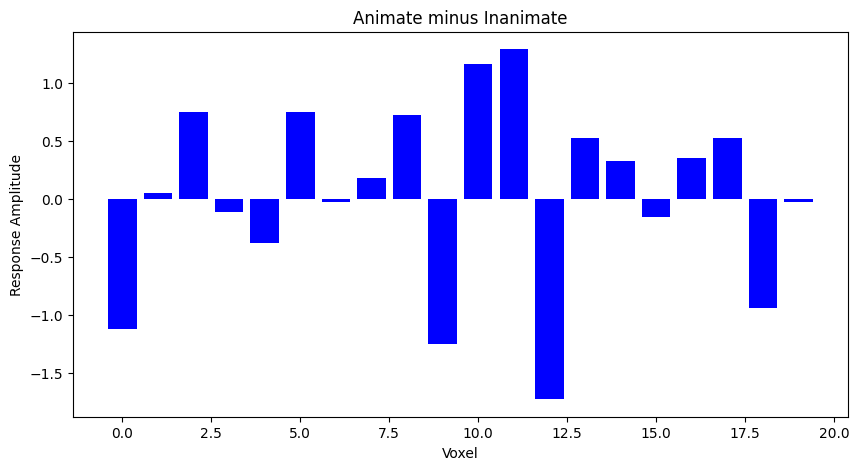

In [73]:
# create bar plot
fig = plt.figure(figsize = (10, 5))

# TODO change x-axis numbers
# creating the bar plot
plt.bar(range(0,20), individ_differences[:20], color ='blue')

plt.ylabel("Response Amplitude")
plt.xlabel("Voxel")
plt.title("Animate minus Inanimate")
plt.show()

NeuralResponses1     -1.124528
NeuralResponses2      0.054977
NeuralResponses3      0.749568
NeuralResponses4     -0.111111
NeuralResponses5     -0.383406
                        ...   
NeuralResponses96    -0.959296
NeuralResponses97    -0.123033
NeuralResponses98     0.652096
NeuralResponses99     0.116231
NeuralResponses100   -1.496236
Length: 100, dtype: float64

# Exercise 2

In [99]:
anim_indices2 = cat_vecs.index[cat_vecs['Var2'] == 0].tolist()
df_anim2 = neural_resp2[neural_resp2.index.isin(anim_indices)].reset_index()

inanim_indices2 = cat_vecs.index[cat_vecs['Var2'] == 1].tolist()
df_inanim2 = neural_resp2[neural_resp2.index.isin(inanim_indices)].reset_index()


df_train = pd.concat([df_anim2[:22], df_inanim2[:22]])
train_labels = [1]*22 +  [-1]*22


df_test = pd.concat([df_anim2[22:], df_inanim2[22:]])
test_labels = [1]*22 +  [-1]*22


In [87]:
# TODO check index
df_inanim2

,index,NeuralResponses1,NeuralResponses2,NeuralResponses3,NeuralResponses4,NeuralResponses5,NeuralResponses6,NeuralResponses7,NeuralResponses8,NeuralResponses9,...,NeuralResponses91,NeuralResponses92,NeuralResponses93,NeuralResponses94,NeuralResponses95,NeuralResponses96,NeuralResponses97,NeuralResponses98,NeuralResponses99,NeuralResponses100
0,44,9.640665,4.634636,5.612727,4.313175,6.524758,-1.063511,2.492158,0.169028,4.057411,...,4.507515,4.190799,7.695801,8.320029,6.302650,9.137691,1.950105,5.432094,8.539863,3.202853
1,45,5.361251,-0.596015,-1.906358,2.633913,3.404042,1.424868,7.466914,5.286281,13.102799,...,5.364114,5.426896,1.769089,6.158266,6.299589,2.963845,3.347694,5.750493,7.086182,4.345480
2,46,5.173400,-2.092368,4.560844,5.899885,4.114208,4.943688,0.297097,3.881180,4.850929,...,3.966960,3.401780,5.246049,5.014253,-1.308779,-1.175646,2.154153,8.870540,-0.422462,2.410221
3,47,13.224893,7.294210,4.772755,6.289148,3.782878,3.109336,5.368408,5.473562,6.452462,...,-0.291877,4.039450,5.111881,10.470724,4.595797,7.460179,4.896536,0.833012,1.480901,5.490605
4,48,7.487902,8.256332,2.325094,3.243742,-2.040123,5.953572,6.631101,1.810750,6.078749,...,2.673980,2.586108,5.991354,6.043559,5.371289,2.563040,6.576583,1.197887,10.283994,3.175840
5,49,0.373401,4.983840,4.921789,1.048239,6.050961,5.245340,4.868937,6.073290,3.245456,...,2.998420,7.359706,-1.269255,6.069504,4.969390,1.158503,4.908116,8.623934,3.179764,5.162484
6,50,7.574970,2.149984,4.235505,2.798428,-2.490707,7.124133,4.097731,9.075999,3.929995,...,0.241158,2.846320,1.899213,3.838641,-0.738040,6.104020,8.277638,2.540313,3.805928,2.161960
7,51,12.033031,6.099217,1.685149,6.895756,3.425033,4.141865,4.811727,0.924054,7.833716,...,12.700902,9.797053,2.079355,10.085970,3.167983,6.206796,2.737631,5.886443,10.956957,6.987654
8,52,4.111745,1.418858,2.176041,5.437240,11.500618,7.482595,6.889817,1.345439,1.696502,...,3.761013,8.488999,6.164659,1.971091,2.788748,0.023030,-0.640082,0.884940,4.000313,1.761511
9,53,1.057938,9.355063,1.442029,3.565263,2.869106,-2.965584,6.419542,10.626261,5.054052,...,8.518153,3.765856,11.590860,5.710963,-1.442117,3.482987,6.302843,0.645863,8.214784,4.393279


In [114]:
clf = svm.SVC(kernel='linear')
clf.fit(df_train, train_labels)
prediction = clf.predict(df_test)
print(accuracy_score(prediction, test_labels))

0.7272727272727273


In [123]:
# Exercise 2b
coefficients = clf.coef_[0,1:21]

In [124]:
len(coefficients)

20

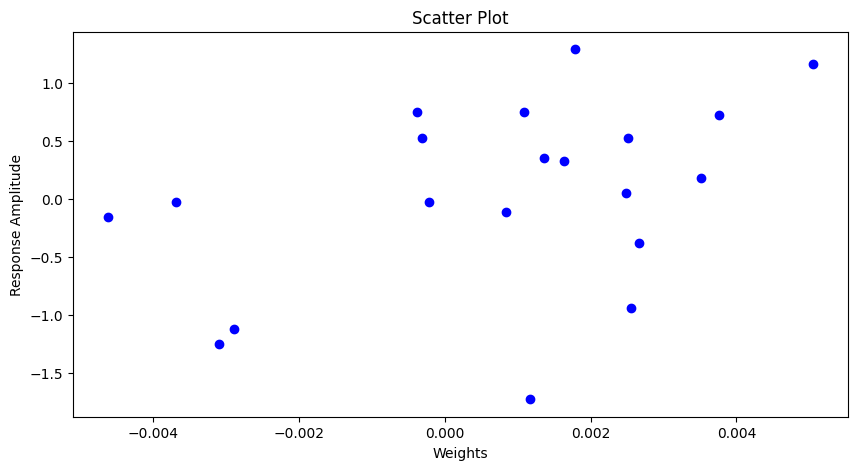

In [126]:
# create bar plot
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.scatter(coefficients, individ_differences[:20], color ='blue')

plt.ylabel("Response Amplitude")
plt.xlabel("Weights")
plt.title("Scatter Plot")
plt.show()

In [129]:
# exercise 2c
print(np.corrcoef(coefficients, individ_differences[:20]))

# perfectly positive, medium correlation

[[1.         0.40187541]
 [0.40187541 1.        ]]


# Exercise 2D

In [168]:
human_indices = cat_vecs.index[((cat_vecs['Var1'] == 1) & (cat_vecs['Var3'] == 1))].tolist()
nonhuman_indices = cat_vecs.index[(cat_vecs['Var1'] == 1) & (cat_vecs['Var4'] == 1)].tolist()

human = neural_resp2[neural_resp2.index.isin(human_indices)][:20]
nonhuman = neural_resp2[neural_resp2.index.isin(nonhuman_indices)]

In [169]:
human_train = pd.concat([human[:10], nonhuman[:10]])
human_train_labels = [1]*10 +  [-1]*10

human_test = pd.concat([human[10:], nonhuman[10:]])
human_test_labels = [1]*10 +  [-1]*10

In [170]:
human_train_labels

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]

In [171]:
clf = svm.SVC(kernel='linear')
clf.fit(human_train, human_train_labels)
prediction = clf.predict(human_test)
print(accuracy_score(prediction, human_test_labels))

0.55


# Exercise 3

In [176]:
import rsatoolbox
import rsatoolbox.rdm as rsr

# calculate a RDM
RDM_euc = rsr.calc_rdm(neural_resp1)
print(RDM_euc)

RecursionError: maximum recursion depth exceeded in comparison